# U-Net

In [1]:
!git clone https://github.com/milesial/Pytorch-UNet.git

Cloning into 'Pytorch-UNet'...


## Pytorch-UNet

use the repo [Pytorch-UNet](https://github.com/milesial/Pytorch-UNet)

In [18]:
import shutil
import os
import json
from PIL import Image, ImageFile
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wandb
# wandb.init(project='hubmap-organ-segmentation')
config = wandb.config

### data preprocess

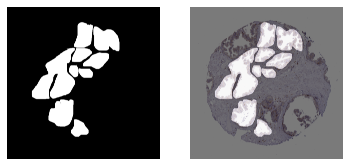

In [46]:
# img dir
ori_root = "./Pytorch-UNet/data/hubmap-organ-segmentation"
img_name_list = os.listdir(os.path.join(ori_root, "train_images"))

img_root = "./Pytorch-UNet/data/imgs"
mask_root = "./Pytorch-UNet/data/masks"

def imgs_dir():
    for img_name in tqdm(img_name_list):
        src_path = os.path.join(ori_root, "train_images", img_name)
        dist_path = os.path.join(img_root, img_name)
        shutil.copy(src_path, dist_path)

# masks dir
# reference: https://www.kaggle.com/code/ishandutta/hubmap-complete-understanding-and-eda-w-b/notebook
def rle2mask(rle, shape):
    rle = rle.split()
    start, length = [np.asarray(x, dtype=int) for x in (rle[0::2], rle[1::2])]
    start = start - 1
    end = start + length
    img = np.zeros(shape[0]*shape[1])
    for x, y in zip(start, end):
        img[x:y] = 255
    return img.reshape(shape).T

def masks_dir():
    truncated_imgs = []
    df = pd.read_csv(os.path.join(ori_root, "train.csv"))
    # wandb.log({"df_train": df})
    ids = df["id"]
    for id in tqdm(ids):
        try:
            img = Image.open(os.path.join(img_root, str(id)+".tiff")).convert("RGB")
            mask = rle2mask(df[df["id"]==id]["rle"].iloc[-1], (img.height, img.width))
            mask = Image.fromarray(mask)
            mask.save(os.path.join(mask_root, str(id)+".tiff"))
        except IOError:
            truncated_imgs.append(id)
    print(truncated_imgs)

# imgs_dir()
# masks_dir()

sample_id = 10044
img = Image.open(os.path.join(img_root, str(sample_id)+".tiff")).convert("RGB")
mask = Image.open(os.path.join(mask_root, str(sample_id)+".tiff")).convert("RGB")
plt.subplot(121)
plt.imshow(mask)
plt.axis("off")
plt.subplot(122)
plt.imshow(img)
plt.imshow(mask, alpha=0.5)
plt.axis("off")
plt.show()

## Train

In [47]:
%cd Pytorch-UNet

c:\Users\znk\Desktop\Programme\image-processing-by-dl\segmentation\U-Net\Pytorch-UNet


In [48]:
!python train.py --epochs 10 --batch-size 8 --learning-rate 3e-4 --validation 10

^C
